## Risk and Return Analysis of Loans

### - Survival Analysis of Loans

*Refer to combined jupyter notebook
      
### - Good Loans and Bad Loans
- Good loans: loans with high maturity (paid to the full term (36 months or 60 months)
- Bad loans: loans with low maturity (Charged off or late payment or entering to grace period, before reaching the maturity)

*Refer to combined jupter notebook

### - Default Ratios and Return Ratios of High-Interest Rate Grades
- Median Return Rate (percentage) of Grade F and G
- Time series analysis of Grade F and G
- Loans reaching high maturity with long terms (60 months)

In [94]:
%matplotlib inline
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [54]:
accepted = pd.read_csv("accepted_b_2015_clean.csv")

In [3]:
accepted.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       

In [4]:
accepted["loan_status"].value_counts() 

#See the combined jupyter notebook for the definition of Fully_Paid and Defaulted

FullyPaid    376150
Defaulted     77497
Name: loan_status, dtype: int64

In [5]:
accepted["term"].value_counts() 

 36 months    337581
 60 months    116066
Name: term, dtype: int64

In [55]:
#invest_return_return returns return rates: payment-prinicial/principal (percentage)
accepted['invest_return_rate_monthly'] = ((accepted['total_pymnt'] - accepted['funded_amnt'])/accepted['funded_amnt'])*100/accepted["duration_months"]
accepted['invest_return'] = accepted['total_pymnt'] - accepted['funded_amnt']

In [41]:
def major_formatter(x, pos):
    return x.upper().replace("_", "")

No handles with labels found to put in legend.


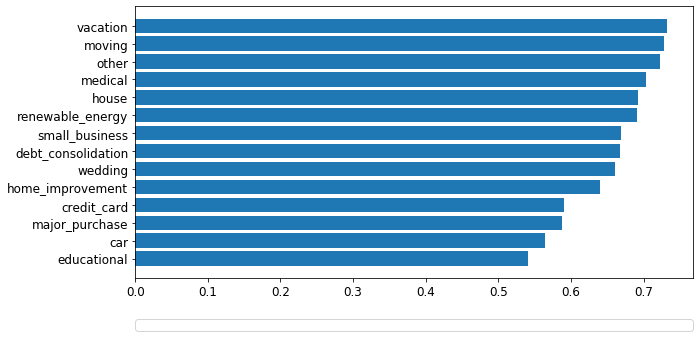

In [48]:
fig, ax = plt.subplots(figsize=(10, 5))

#purpose_ = accepted.groupby('purpose')[["invest_return_rate_monthly"]].median().sort_values(by="invest_return_rate_monthly", ascending=False)
plt.barh(y='purpose', width='invest_return_rate_monthly',data=purpose_)

plt.rcParams.update({'font.size': 15})
ax.invert_yaxis()
plt.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0)

In [26]:
accepted.groupby(['grade', 'sub_grade']).agg({"funded_amnt":"median", 'invest_return':'median', 'invest_return_rate_monthly':'median', "duration_months": "median"})

funded_amnt  invest_return  invest_return_rate_monthly  \
grade sub_grade                                                           
A     A1             12000.0     887.940000                    0.297849   
      A2             11500.0     937.330001                    0.321956   
      A3             12000.0    1100.080000                    0.358801   
      A4             12000.0    1167.676904                    0.379581   
      A5             12000.0    1335.420000                    0.425569   
B     B1             12000.0    1381.379605                    0.480751   
      B2             12000.0    1547.366032                    0.530101   
      B3             11500.0    1605.783342                    0.572921   
      B4             12000.0    1703.760000                    0.615755   
      B5             10800.0    1624.213899                    0.644356   
C     C1             11050.0    1705.131844                    0.677288   
      C2             11800.0    1824.596459                    0.719661   
      C3             12000.0    1938.970000                    0.754517   
      C4             13000.0    2020.640000                    0.787831   
      C5             13225.0    2031.510001                    0.823798   
D     D1             12000.0    2019.178747                    0.848417   
      D2             12000.0    1955.552809                    0.865107   
      D3             12312.5    1953.015000                    0.901782   
      D4             14400.0    2127.670003                    0.932418   
      D5             15000.0    2137.744585                    0.968569   
E     E1             15450.0    2317.028831                    1.009848   
      E2             16000.0    2303.527628                    1.036795   
      E3             16375.0    2473.695857                    1.071775   
      E4             17500.0    2528.180000                    1.098702   
      E5             16775.0    2359.700000                    1.119875   
F     F1             17275.0    2279.845000                    1.154662   
      F2             18825.0    2873.380013                    1.188225   
      F3             16950.0    2307.767118                    1.189223   
      F4             18550.0    2710.694528                    1.197673   
      F5             20000.0    3109.736219                    1.228353   
G     G1             20000.0    2469.315869                    1.234046   
      G2             20000.0    3293.740000                    1.288519   
      G3             20000.0    3507.760000                    1.240581   
      G4             21600.0    3276.339387                    1.142315   
      G5             19875.0    2059.757886                    1.055401   

                 duration_months  
grade sub_grade                   
A     A1                      29  
      A2                      29  
      A3                      29  
      A4                      29  
      A5                      29  
B     B1                      29  
      B2                      28  
      B3                      29  
      B4                      28  
      B5                      27  
C     C1                      27  
      C2                      27  
      C3                      27  
      C4                      27  
      C5                      27  
D     D1                      26  
      D2                      26  
      D3                      25  
      D4                      25  
      D5                      25  
E     E1                      25  
      E2                      25  
      E3                      24  
      E4                      24  
      E5                      24  
F     F1                      24  
      F2                      23  
      F3                      22  
      F4                      22  
      F5                      20  
G     G1                      21  
      G2                      21  
      G3                      21  
      G4        

In [21]:
#purpose_ = purpose_.reset_index()
purpose_.columns

Index(['purpose', 'invest_return_rate_monthly'], dtype='object')

In [13]:
#Sorted the above list by sub_grade by highest return rate

#maybe compare with default_rate and sort it with return rate and find highest ones

accepted.groupby(['grade', 'sub_grade']).agg({"funded_amnt":"median", 'invest_return':'median', 'invest_return_rate_monthly':'median', "duration_months": "median"}).sort_values(by="invest_return_rate_monthly", ascending=False)

funded_amnt  invest_return  invest_return_rate_monthly  \
grade sub_grade                                                           
G     G2             20000.0    3293.740000                    1.288519   
      G3             20000.0    3507.760000                    1.240581   
      G1             20000.0    2469.315869                    1.234046   
F     F5             20000.0    3109.736219                    1.228353   
      F4             18550.0    2710.694528                    1.197673   
      F3             16950.0    2307.767118                    1.189223   
      F2             18825.0    2873.380013                    1.188225   
      F1             17275.0    2279.845000                    1.154662   
G     G4             21600.0    3276.339387                    1.142315   
E     E5             16775.0    2359.700000                    1.119875   
      E4             17500.0    2528.180000                    1.098702   
      E3             16375.0    2473.695857                    1.071775   
G     G5             19875.0    2059.757886                    1.055401   
E     E2             16000.0    2303.527628                    1.036795   
      E1             15450.0    2317.028831                    1.009848   
D     D5             15000.0    2137.744585                    0.968569   
      D4             14400.0    2127.670003                    0.932418   
      D3             12312.5    1953.015000                    0.901782   
      D2             12000.0    1955.552809                    0.865107   
      D1             12000.0    2019.178747                    0.848417   
C     C5             13225.0    2031.510001                    0.823798   
      C4             13000.0    2020.640000                    0.787831   
      C3             12000.0    1938.970000                    0.754517   
      C2             11800.0    1824.596459                    0.719661   
      C1             11050.0    1705.131844                    0.677288   
B     B5             10800.0    1624.213899                    0.644356   
      B4             12000.0    1703.760000                    0.615755   
      B3             11500.0    1605.783342                    0.572921   
      B2             12000.0    1547.366032                    0.530101   
      B1             12000.0    1381.379605                    0.480751   
A     A5             12000.0    1335.420000                    0.425569   
      A4             12000.0    1167.676904                    0.379581   
      A3             12000.0    1100.080000                    0.358801   
      A2             11500.0     937.330001                    0.321956   
      A1             12000.0     887.940000                    0.297849   

                 duration_months  
grade sub_grade                   
G     G2                      21  
      G3                      21  
      G1                      21  
F     F5                      20  
      F4                      22  
      F3                      22  
      F2                      23  
      F1                      24  
G     G4                      22  
E     E5                      24  
      E4                      24  
      E3                      24  
G     G5                      20  
E     E2                      25  
      E1                      25  
D     D5                      25  
      D4                      25  
      D3                      25  
      D2                      26  
      D1                      26  
C     C5                      27  
      C4                      27  
      C3                      27  
      C2                      27  
      C1                      27  
B     B5                      27  
      B4                      28  
      B3                      29  
      B2                      28  
      B1                      29  
A     A5                      29  
      A4                      29  
      A3                      29  
      A2        

In [84]:
new = accepted.groupby(['grade', 'sub_grade']).agg({"funded_amnt":"median", 'invest_return':'median', 'invest_return_rate_monthly':'median', "duration_months": "median"}).sort_values(by="invest_return_rate_monthly", ascending=False)

In [92]:
new2 = accepted.groupby(['grade']).agg({"funded_amnt":"median", 'invest_return':'median', 'invest_return_rate_monthly':'median', "duration_months": "median"}).sort_values(by="invest_return_rate_monthly", ascending=True)

<BarContainer object of 7 artists>

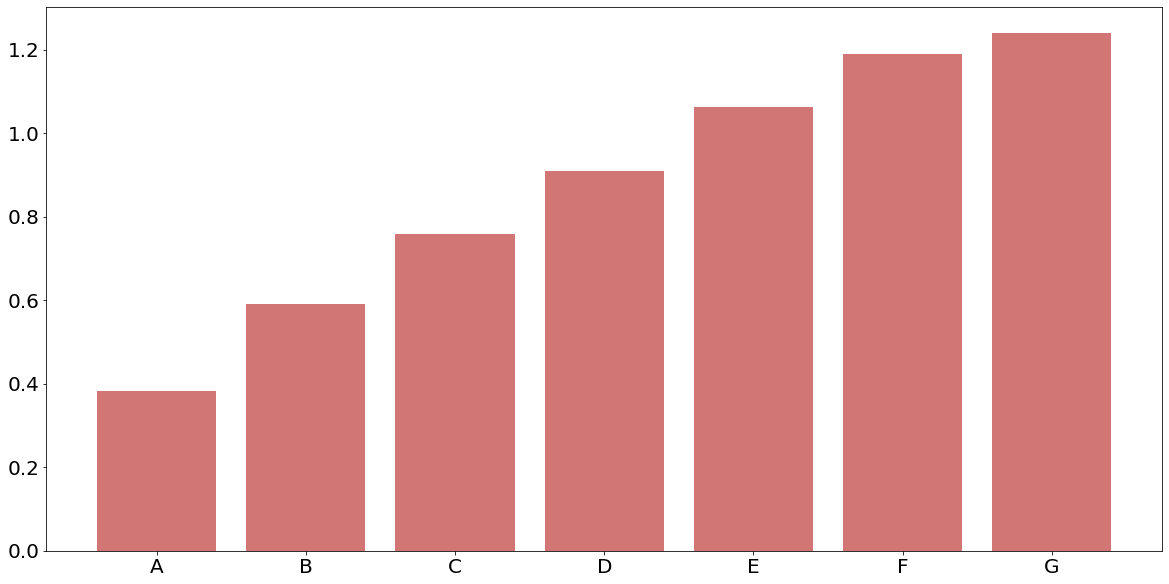

In [93]:
fig, ax = plt.subplots(figsize=(20, 10))
new2 = new2.reset_index()[["grade", 'invest_return_rate_monthly']]
color=(0.7, 0.1, 0.1, 0.6)
plt.bar(x="grade", height='invest_return_rate_monthly', color = color, data=new2)


In [17]:
accepted.groupby(['grade']).agg({"funded_amnt":"median", 'invest_return':'median', 'invest_return_rate_monthly':'median', "duration_months": "median"})

,funded_amnt,invest_return,invest_return_rate_monthly,duration_months
grade,,,,
A,12000.0,1099.510011,0.383526,29
B,11700.0,1567.189410,0.591130,28
C,12000.0,1884.194274,0.757538,27
D,13000.0,2023.242047,0.909100,26
E,16100.0,2371.100000,1.061898,24
F,18000.0,2562.200070,1.190760,23
G,20000.0,2871.050779,1.239643,21


In [56]:
#default ratio by sub_grade

status = accepted[accepted["loan_status"]=="Defaulted"].groupby(["grade", "sub_grade"]).agg({"sub_grade": "count"})
temp = accepted.groupby(["grade", "sub_grade"]).agg({"sub_grade": "count"})
status['ratio'] = ((status[['sub_grade']]/temp)*100).round(2)

status

sub_grade  ratio
grade sub_grade                  
A     A1               294   2.79
      A2               474   4.33
      A3               599   4.77
      A4              1179   6.20
      A5              1630   7.56
B     B1              1977   8.75
      B2              2555   9.71
      B3              3474  11.11
      B4              3740  12.51
      B5              3487  14.05
C     C1              4057  15.42
      C2              4423  17.04
      C3              4680  19.13
      C4              4826  20.83
      C5              4651  21.81
D     D1              4247  23.08
      D2              3991  24.59
      D3              3521  24.82
      D4              3637  27.14
      D5              3073  27.91
E     E1              2599  30.49
      E2              2614  31.87
      E3              2156  32.58
      E4              1938  34.08
      E5              1689  34.82
F     F1              1273  33.71
      F2              1048  36.40
      F3               968  37.03
      F4               797  39.89
      F5               584  40.08
G     G1               452  42.72
      G2               311  39.72
      G3               241  43.11
      G4               160  40.61
      G5               152  42.46

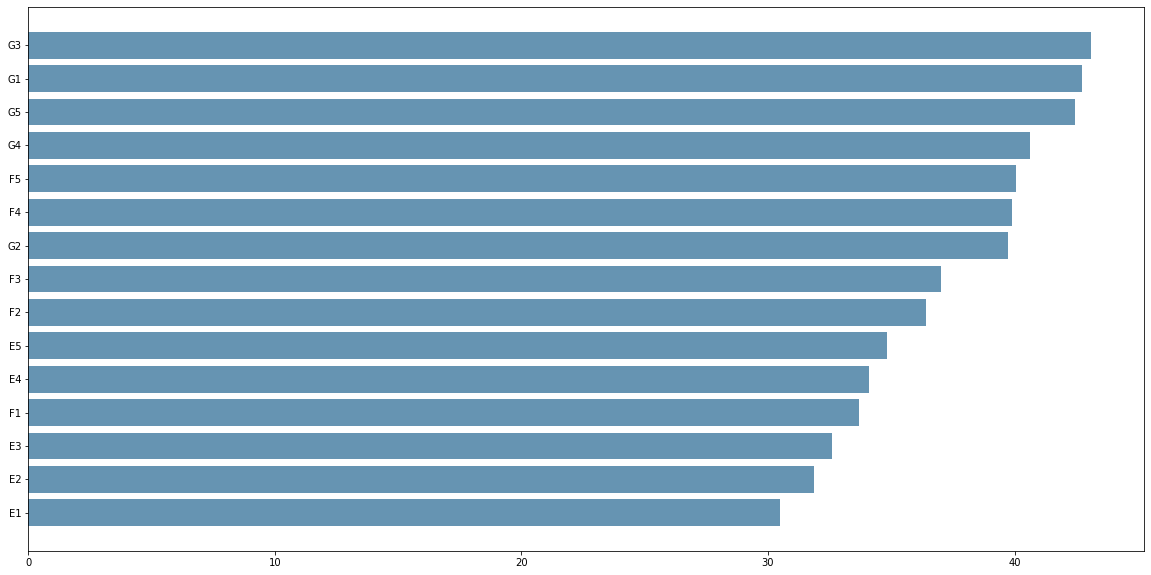

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))

defaulted = status[['ratio']].nlargest(15, 'ratio').reset_index()
color=(0.0, 0.3, 0.5, 0.6)
plt.barh(y="sub_grade", width='ratio', color = color, data=defaulted)
ax.invert_yaxis()


In [66]:
status2 = accepted[accepted["loan_status"]=="Defaulted"].groupby(["grade"]).agg({"grade": "count"})
temp = accepted.groupby(["grade"]).agg({"grade": "count"})
status2['ratio'] = ((status2[['grade']]/temp)*100).round(2)

In [68]:
status2

,grade,ratio
grade,,
A,4176,5.60
B,15233,11.29
C,22637,18.67
D,18469,25.22
E,10996,32.45
F,4670,36.70
G,1316,41.75


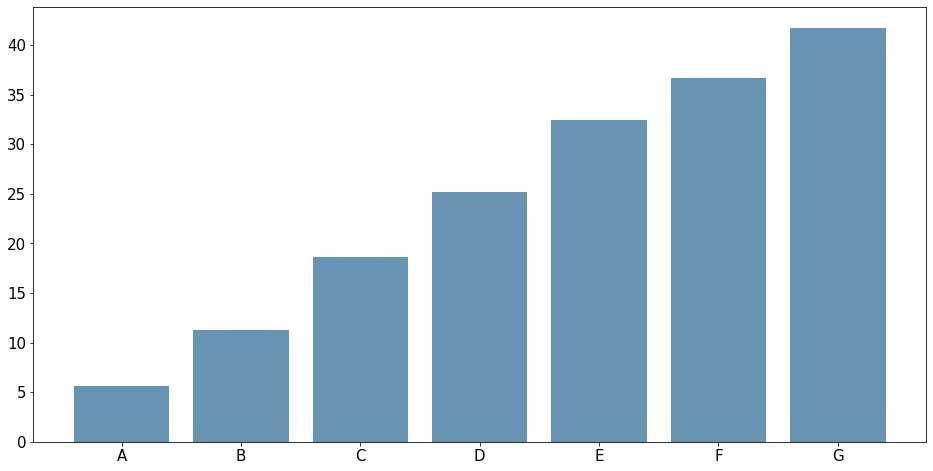

In [77]:
fig, ax = plt.subplots(figsize=(16, 8))

defaulted = status2[['ratio']].reset_index()
color=(0.0, 0.3, 0.5, 0.6)
plt.bar(x="grade", height='ratio', color = color, data=defaulted)
plt.rcParams.update({'font.size': 20})

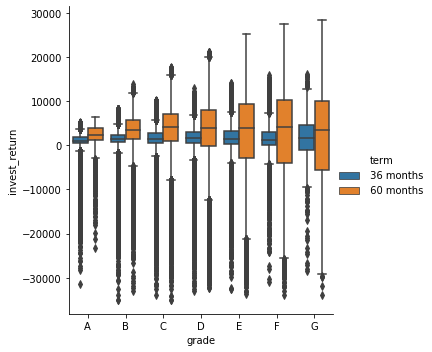

In [105]:
order = accepted.groupby("grade")[['invest_return']].median().sort_values(by="invest_return", ascending=True)
sns.catplot(x="grade", y="invest_return", kind="box", hue="term", data=accepted, order=order.index)

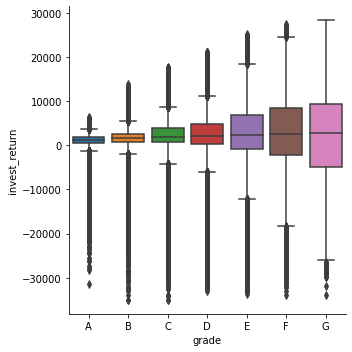

In [103]:
order2 = accepted.groupby("grade")[['invest_return']].median().sort_values(by="invest_return", ascending=True)
order2
sns.catplot(x="grade", y="invest_return", kind="box", data=accepted, order=order2.index)


In [ ]:
sns.catplot(x="grade", y="loss", kind="box", hue="term", data=charged_off, order=order.index)

In [22]:
#Now to comparing the best sub_grade with highest return rate and lower default rate..

rate_comp = accepted.groupby(['grade', 'sub_grade']).agg({"funded_amnt":"median", 'invest_return':'median', 'invest_return_rate_monthly':'median', "duration_months": "median"}).sort_values(by="invest_return_rate_monthly", ascending=False)
rate_comp['default_rate'] = status["ratio"]

In [24]:
rate_comp[["invest_return_rate_monthly"]].describe().round(2)

,invest_return_rate_monthly
count,35.00
mean,0.86
std,0.31
min,0.30
25%,0.63
50%,0.90
75%,1.13
max,1.29


In [ ]:
rate_comp[["invest_return_rate_monthly"]].median()

In [25]:
#Right now simply sorted by descending order, but it would be nicer to find a good mix (high return, low default)

rate_comp[["invest_return_rate_monthly", "default_rate"]].sort_values(by=["invest_return_rate_monthly", "default_rate"], ascending=False)

invest_return_rate_monthly  default_rate
grade sub_grade                                          
G     G2                           1.288519         39.72
      G3                           1.240581         43.11
      G1                           1.234046         42.72
F     F5                           1.228353         40.08
      F4                           1.197673         39.89
      F3                           1.189223         37.03
      F2                           1.188225         36.40
      F1                           1.154662         33.71
G     G4                           1.142315         40.61
E     E5                           1.119875         34.82
      E4                           1.098702         34.08
      E3                           1.071775         32.58
G     G5                           1.055401         42.46
E     E2                           1.036795         31.87
      E1                           1.009848         30.49
D     D5                           0.968569         27.91
      D4                           0.932418         27.14
      D3                           0.901782         24.82
      D2                           0.865107         24.59
      D1                           0.848417         23.08
C     C5                           0.823798         21.81
      C4                           0.787831         20.83
      C3                           0.754517         19.13
      C2                           0.719661         17.04
      C1                           0.677288         15.42
B     B5                           0.644356         14.05
      B4                           0.615755         12.51
      B3                           0.572921         11.11
      B2                           0.530101          9.71
      B1                           0.480751          8.75
A     A5                           0.425569          7.56
      A4                           0.379581          6.20
      A3                           0.358801          4.77
      A2                           0.321956          4.33
      A1                           0.297849          2.79

In [26]:
rate_comp = rate_comp.reset_index()

In [27]:
rate_comp.columns                                                                                        #using the as_index=False parameter in groupby function  as groupby + reset_index()in terms of handling multi-index as a "normal" df

Index(['grade', 'sub_grade', 'funded_amnt', 'invest_return',
       'invest_return_rate_monthly', 'duration_months', 'default_rate'],
      dtype='object')

In [28]:
rate_comp.index

RangeIndex(start=0, stop=35, step=1)

In [29]:
rate =[]
def selected(d):
    for rows in d:
        if rows > d.median():
            return rate.append(rows)

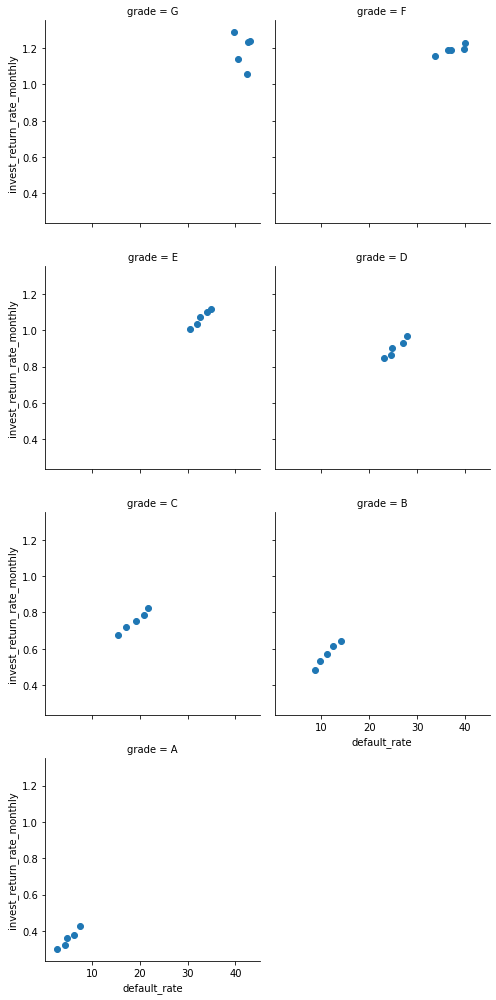

In [31]:
g = sns.FacetGrid(rate_comp, col="grade", col_wrap=2, height=3.5)
g = g.map(plt.scatter, "default_rate", "invest_return_rate_monthly")

In [ ]:
## Create new overall scatter plot

In [ ]:
## should create the second metric?? to combine default rate and return rate?

In [ ]:
# from sklearn.preprocessing import StandardScaler
# d = rate_comp["default_rate"].values.astype(float)
# i = rate_comp["invest_return_rate"].values.astype(float)
# scaler = StandardScaler()

# scaled_d = scaler.fit_transform(d)
# scaled_i = scaler.fit_transform(i)

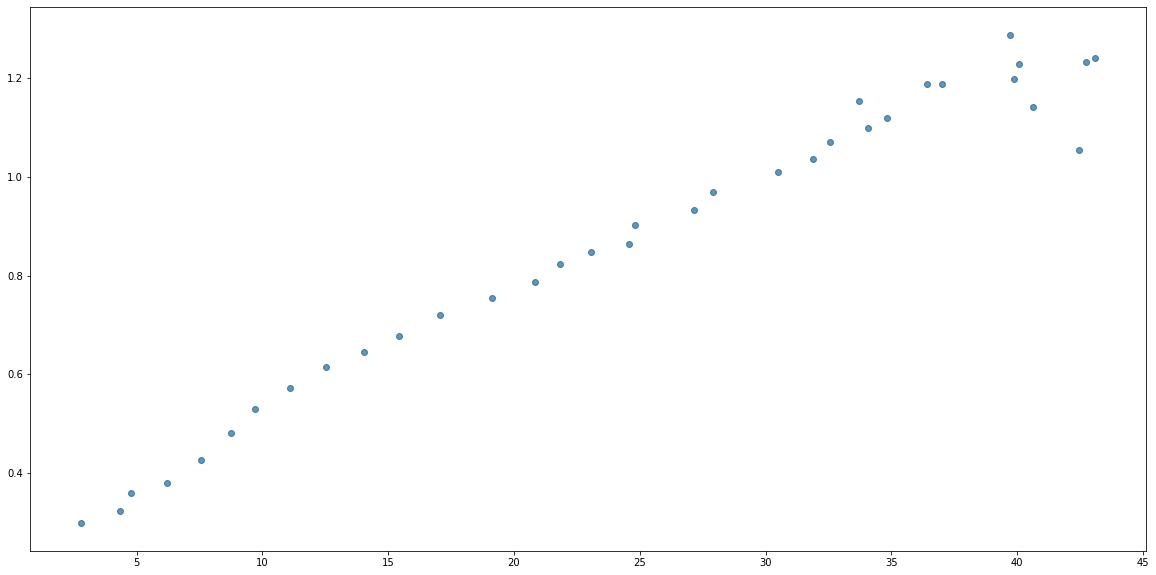

In [33]:
#Very linear relationship

fig, ax = plt.subplots(figsize=(20, 10))

color=(0.0, 0.3, 0.5, 0.6)
plt.scatter(x="default_rate", y="invest_return_rate_monthly", color = color, data=rate_comp)

In [5]:
model = accepted[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term','installment', 'grade', 'sub_grade', 'annual_inc', 'purpose', 'zip_code','addr_state', 'dti','fico_range_low', 'fico_range_high', 'tot_cur_bal']]
        
                  

In [7]:
model.dtypes

loan_amnt          float64
funded_amnt        float64
funded_amnt_inv    float64
term                object
installment        float64
grade               object
sub_grade           object
annual_inc         float64
purpose             object
zip_code            object
addr_state          object
dti                float64
fico_range_low     float64
fico_range_high    float64
tot_cur_bal        float64
dtype: object

In [6]:
#ordinal encoding for grade
from sklearn.preprocessing import OrdinalEncoder
grade_ord = OrdinalEncoder( )

grade_enc = grade_ord.fit_transform(model[['grade']]) #.reshape(-1,1) could be added
model[["grade"]] = grade_enc #no need to do .value??

/Users/kisaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kisaki/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [7]:
#ordinal encoding for term
from sklearn.preprocessing import OrdinalEncoder
term_ord = OrdinalEncoder( )

term_enc = term_ord.fit_transform(model[['term']]) #.reshape(-1,1) could be added
model[["term"]] = term_enc

/Users/kisaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kisaki/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [8]:
#ordinal encoding for sub_grade
from sklearn.preprocessing import OrdinalEncoder
sub_grade_ord = OrdinalEncoder( )

sub_grade_enc = term_ord.fit_transform(model[['sub_grade']]) #.reshape(-1,1) could be added
model[["sub_grade"]] = sub_grade_enc

/Users/kisaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kisaki/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [9]:
#ordinal encoding for purpose
from sklearn.preprocessing import OrdinalEncoder
purpose_ord = OrdinalEncoder( )

purpose_enc = term_ord.fit_transform(model[['purpose']]) #.reshape(-1,1) could be added
model[["purpose"]] = purpose_enc

/Users/kisaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kisaki/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [10]:
#ordinal encoding for zip_code
from sklearn.preprocessing import OrdinalEncoder
zip_code_ord = OrdinalEncoder( )

zip_code_enc = term_ord.fit_transform(model[['zip_code']]) #.reshape(-1,1) could be added
model[["zip_code"]] = zip_code_enc

/Users/kisaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kisaki/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [11]:
#ordinal encoding for addr_state
from sklearn.preprocessing import OrdinalEncoder
addr_state_ord = OrdinalEncoder( )

addr_state_enc = term_ord.fit_transform(model[['addr_state']]) #.reshape(-1,1) could be added
model[["addr_state"]] = addr_state_enc

/Users/kisaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kisaki/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [12]:
model.dtypes

loan_amnt          float64
funded_amnt        float64
funded_amnt_inv    float64
term               float64
installment        float64
grade              float64
sub_grade          float64
annual_inc         float64
purpose            float64
zip_code           float64
addr_state         float64
dti                float64
fico_range_low     float64
fico_range_high    float64
tot_cur_bal        float64
dtype: object

In [ ]:
# #skipt this process

# #dropping any column names that include invest/return/rate to reduce muticollinearity

# mask = accepted.filter(regex='invest|return|rate').columns
# X = accepted.drop(mask, axis=1)

# #Now defining X and y for training models
# y = accepted[["invest_return_rate_monthly"]]

# print(X.shape)
# print(y.shape)

In [31]:
y = np.array(accepted[["invest_return"]]).reshape(-1,1)
X = model

print(X.shape)
print(y.shape)

(453647, 15)
(453647, 1)


In [18]:
y = y.astype(float)

In [46]:
X.isnull().sum()

loan_amnt          0
funded_amnt        0
funded_amnt_inv    0
term               0
installment        0
grade              0
sub_grade          0
annual_inc         0
purpose            0
zip_code           0
addr_state         0
dti                0
fico_range_low     0
fico_range_high    0
tot_cur_bal        0
dtype: int64

In [ ]:
#Infinity in the y causing the issue
#np.where(y.values >= np.finfo(np.float64).max)


In [47]:
y.isnull().sum()

invest_return    0
dtype: int64

In [35]:
y = y.astype(float)
y

array([[-3788.31      ],
       [ 2392.37      ],
       [  373.43      ],
       ...,
       [ 9272.93998424],
       [-9922.81      ],
       [ 3388.94825537]])

In [36]:
np.random.seed(0)
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.2, shuffle=True)

In [17]:
from sklearn import ensemble

randomForest = ensemble.RandomForestRegressor()
bagging      = ensemble.BaggingRegressor()

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xtrain = pd.DataFrame( ss.fit_transform(Xtrain), columns = Xtrain.columns)
Xtrain.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,annual_inc,purpose,zip_code,addr_state,dti,fico_range_low,fico_range_high,tot_cur_bal
0,-0.505135,-0.502791,-0.492988,-0.585321,-0.370496,-0.604527,-0.300728,-0.393062,-0.688745,-0.570271,-0.914681,-1.224499,-0.686069,-0.686063,-0.473361
1,1.191630,1.196562,1.201915,-0.585321,1.330869,-1.363740,-1.068141,0.655585,-0.276460,-0.745357,0.302217,0.140710,1.099215,1.099199,1.060016
2,-1.535313,-1.534541,-1.522036,-0.585321,-1.554444,0.154687,0.006237,-0.961820,0.548110,-1.320641,0.707849,-0.423236,-0.361472,-0.361470,-0.892715
3,-0.505135,-0.502791,-0.492988,1.708465,-0.766549,0.913900,1.234098,-0.446383,-0.276460,-1.574338,1.045876,-0.120849,0.125424,0.125420,-0.441500
4,-0.262740,-0.260026,-0.250859,-0.585321,-0.232496,-1.363740,-1.375106,0.338431,-0.688745,-1.056225,0.978271,-0.845558,0.612319,0.612309,0.410486


In [52]:
#Random Forest

randomForest.set_params(random_state=42, n_estimators=100, max_features=2, n_jobs=-1)
randomForest.fit(Xtrain, ytrain) # fit 

/Users/kisaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [53]:
randomForest.score(Xtrain, ytrain) #accuracy

0.8673007434553539

In [54]:
from sklearn.metrics import mean_squared_error, r2_score
y_predicted = randomForest.predict(Xtest)

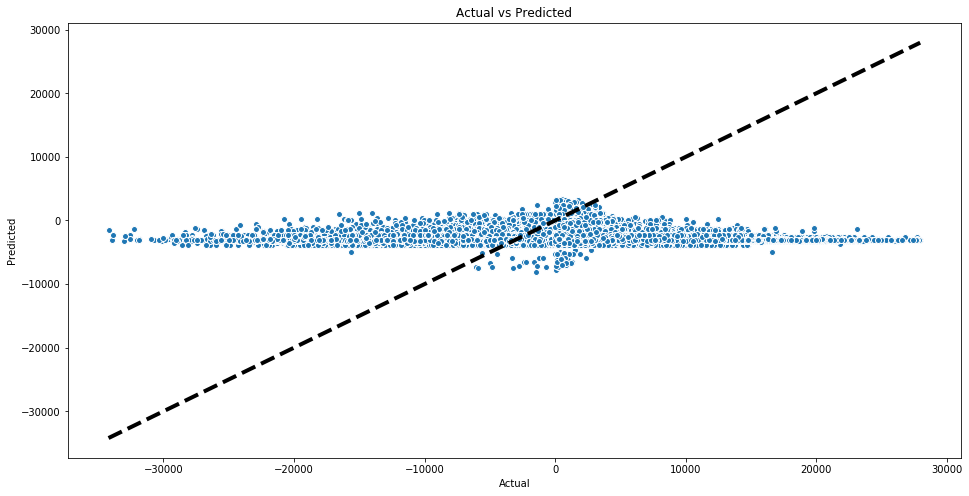

In [55]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(ytest, y_predicted, edgecolors=(1, 1, 1))
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")

plt.savefig('actual_vs_predicted.png')

In [56]:
from sklearn.metrics import mean_squared_error
print("Test error is : {}".format(1- randomForest.score(Xtest, ytest)))
mse=(mean_squared_error(ytest, randomForest.predict(Xtest)))
print("Mean Squared Error: {}".format(mse))
rmse = np.sqrt(mean_squared_error(ytest, randomForest.predict(Xtest)))
print("Root Mean Squared Error: {}".format(rmse))

Test error is : 1.7813431813171405
Mean Squared Error: 43665884.88804378
Root Mean Squared Error: 6608.016713662563


In [57]:
#Plot feature by importance

feature_importance = list(zip(Xtrain.columns, randomForest.feature_importances_))
dtype = [('feature', 'object'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))

importance = pd.DataFrame({'name':name,'score':score})[:20]
importance

,name,score
0,installment,0.108174
1,dti,0.107259
2,tot_cur_bal,0.104791
3,zip_code,0.098535
4,annual_inc,0.095868
5,funded_amnt_inv,0.073104
6,addr_state,0.067406
7,sub_grade,0.065473
8,funded_amnt,0.055862
9,loan_amnt,0.055108


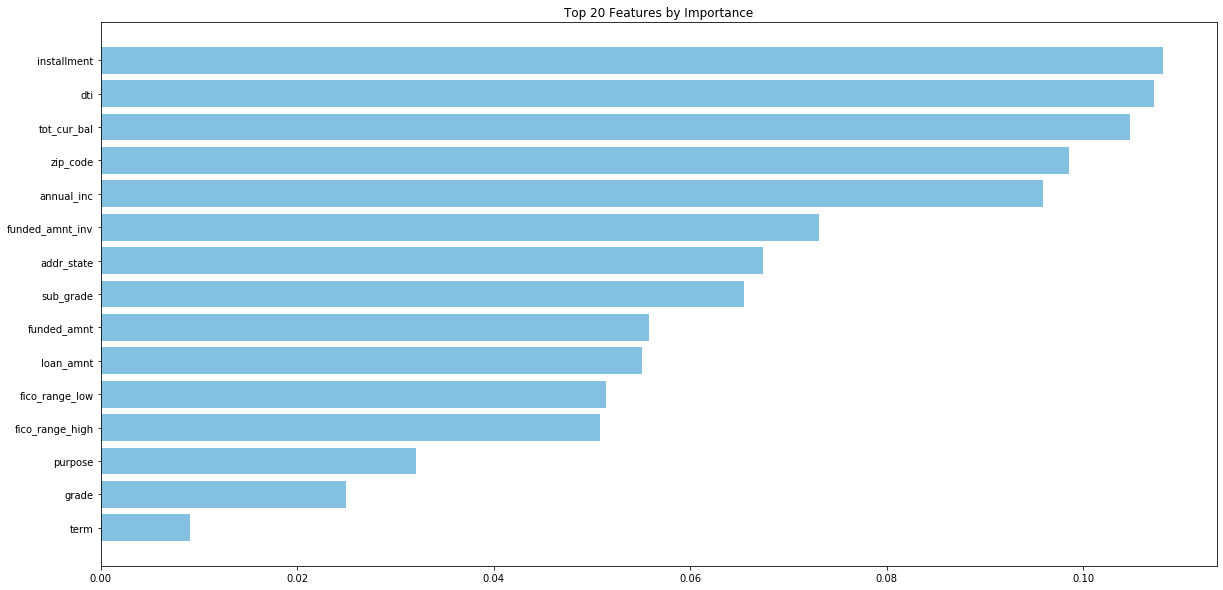

In [58]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(importance.name, importance.score, color=(0.2, 0.6, 0.8, 0.6))
plt.gca().invert_yaxis()
ax.set_title('Top 20 Features by Importance')
plt.ylabel('', fontsize=16)

plt.savefig('importance.png')

In [38]:
# from sklearn.model_selection import GridSearchCV
# grid_para_forest = [{
#     "n_estimators": [100, 300],
#     #"criterion": ["entropy"],
#     "min_samples_leaf": range(1, 10),
#     "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int),
#     "random_state": [42]}]
# grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring='accuracy', cv=5, n_jobs=-1)
# grid_search_forest.fit(Xtrain, ytrain)

In [107]:
import xgboost as xgb
#from xgboost import XGBRegressor

xgtrain = xgb.DMatrix(Xtrain.as_matrix(), label=y.tolist())
xgtest = xgb.DMatrix(Xtest.as_matrix())

AttributeError: module 'xgboost' has no attribute 'DMatrix'

In [96]:
#XGBoost
params = {'objective': 'reg:linear', 
      'max_depth': 2, 'learning_rate': .1,    
      'min_child_weight': 3, 'colsample_bytree': .7,
      'subsample': .8, 'gamma': 0, 'alpha': 1}

In [103]:
# xgb_= xgb.LGBMRegressor(objective='regression',num_leaves=8,
#                               learning_rate=0.05, n_estimators=760,
#                               max_bin = 55, bagging_fraction = 0.667,
#                               bagging_freq = 5, feature_fraction = 0.4181818181818182,
#                               feature_fraction_seed=1, bagging_seed=1,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 5)

In [ ]:
from sklearn import svm
clf = svm.SVR(n_jobs=-1)
clf.fit(Xtrain, ytrain)